## Probabilidade

É difícil praticar data science sem saber da de probabilidade e das suas respetivas operações matemáticas.

#### Probabilidade condicional

In [22]:
import enum, random

class Kid(enum.Enum):
    BOY = 0
    GIRL = 1
    
def random_kid() -> Kid:
    return random.choice([Kid.BOY, Kid.GIRL])

In [6]:
both_girls = 0
older_girl = 0
either_girl = 0

random.seed(0)

for _ in range(10000):
    younger = random_kid()
    
    older = random_kid()
    if older == Kid.GIRL:
        older_girl += 1
    
    if older == Kid.GIRL and younger == Kid.GIRL:
        both_girls += 1
    
    if older == Kid.GIRL or younger == Kid.GIRL:
        either_girl += 1

In [7]:
print("P(Both | Older):", both_girls / older_girl)
print("P(Both | either):", both_girls / either_girl)

P(Both | Older): 0.5007089325501317
P(Both | either): 0.3311897106109325


#### O teorema de Bayes

P(E|F) = P(E,F) / P(F) = P(F|E)P(E) / P(F)

#### Distribuições contínuas

In [8]:
def uniform_pdf(x: float) -> float:
    return x if 0 <= x < 1 else 0

def uniform_cdf(x: float) -> float:
    """Return the probability that a uniform random variable is <= x"""
    
    if x < 0: return 0           # uniform random is never less than 0
    elif x < 1: return x         # e.g P(X <= 0.4) = 0.4
    else: return 1               # uniform random is always less than 1

#### Distribuição Normal

In [10]:
import math

SQRT_TWO_PI = math.sqrt(2 * math.pi)

def normal_pdf(x: float, mu: float = 0, sigma: float = 1) -> float:
    return (math.exp(-(x-mu) ** 2 / 2 / sigma ** 2) / (SQRT_TWO_PI * sigma))

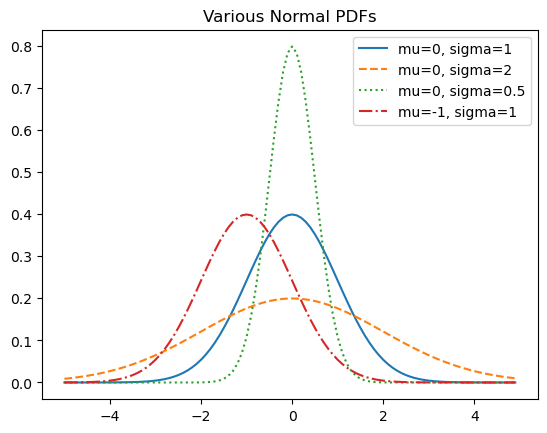

In [15]:
import matplotlib.pyplot as plt

xs = [x / 10.0 for x in range(-50, 50)]

plt.plot(xs, [normal_pdf(x,sigma=1) for x in xs], '-', label='mu=0, sigma=1')
plt.plot(xs, [normal_pdf(x,sigma=2) for x in xs], '--', label='mu=0, sigma=2')
plt.plot(xs, [normal_pdf(x,sigma=0.5) for x in xs], ':', label='mu=0, sigma=0.5')
plt.plot(xs, [normal_pdf(x,mu=-1) for x in xs], '-.', label='mu=-1, sigma=1')
plt.legend()
plt.title("Various Normal PDFs")
plt.show()

In [19]:
def normal_cdf(x: float, mu: float = 0, sigma: float = 1) -> float:
    return (1 + math.erf((x - mu) / math.sqrt(2) / sigma)) / 2

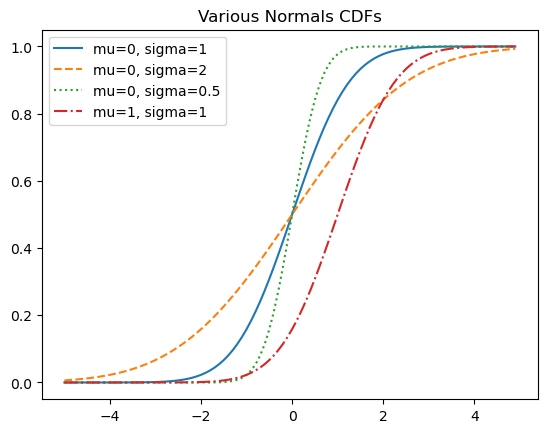

In [20]:
xs = [x / 10.0 for x in range(-50, 50)]

plt.plot(xs, [normal_cdf(x, sigma=1) for x in xs], '-', label='mu=0, sigma=1')
plt.plot(xs, [normal_cdf(x, sigma=2) for x in xs], '--', label='mu=0, sigma=2')
plt.plot(xs, [normal_cdf(x, sigma=0.5) for x in xs], ':', label='mu=0, sigma=0.5')
plt.plot(xs, [normal_cdf(x, mu=1) for x in xs], '-.', label='mu=1, sigma=1')
plt.legend()
plt.title("Various Normals CDFs")
plt.show()

In [1]:
def inversal_normal_cdf(p: float,
                        mu: float = 0,
                        sigma: float = 1,
                        tolerance: float = 0.00001) -> float:
    """Find approximate inverse using binary search"""
    
    if mu != 0 or sigma != 1:
        return mu + sigma * inversal_normal_cdf(p, tolerance=tolerance)
    
    low_z = -10.0          # normal_cdf(-10) is (very close to) 0
    hi_z = 10.0            # normal_cdf(10) is (very close to) 1
    
    while hi_z - low_z > tolerance:
        mid_z = (low_z + hi_z) / 2
        mid_p = normal_cdf(mid_z)
        
        if mid_p < p:
            low_z = mid_z
        else:
            hi_z = mid_z
    
    return mid_z

In [28]:
def bernoulli_trial(p: float) -> int:
    """Returns 1 with probability p and 0 with probability 1-p"""
    return 1 if random.random() < p else 0

def binomial(n: int, p: float) -> int:
    """Return the sum of n bernoulli(p) trials"""
    return sum(bernoulli_trial(p) for _ in range(n))

In [31]:
from collections import Counter

def binomial_histogram(p: float, n: int, num_points: int) -> None:
    """Picks points from binominal(n, p) and plots their histogram"""
    
    data = [binomial(n, p) for _ in range(num_points)]    
    histogram = Counter(data)
    
    plt.bar([x - 0.4 for x in histogram.keys()],
            [v / num_points for v in histogram.values()],
             0.8,
             color='0.75')
    
    mu = p * n
    sigma = math.sqrt(n * p * (1 - p))
    
    xs = range(min(data), max(data) + 1)
    ys = [normal_cdf(i + 0.5, mu, sigma) - normal_cdf(i - 0.5, mu, sigma)
         for i in xs]
    
    plt.plot(xs, ys)
    plt.title("Binomial Distribution vs Normal Approximation")
    plt.plot()

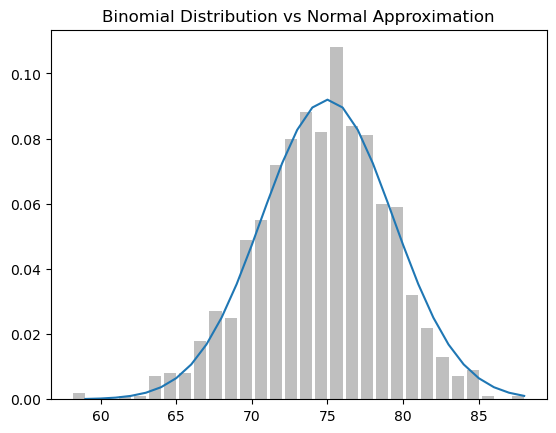

In [32]:
binomial_histogram(0.75, 100, 1000)